In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Colormap for time
import numpy as np

import sys
sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics")
import FluidicSetupFunctions


In [3]:
#Location = r"C:\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\data_analysis"
Location = r"C:\\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\GitHub\Thermal_Soft_Robotics\Thermal_actuation\Experimental\Fluidic\Membrane_valve_leak_test"
Foldernames = ["\\Data"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

Loading... Folder 1 of 1, Sample 1 of 3
Loading... Folder 1 of 1, Sample 2 of 3
Loading... Folder 1 of 1, Sample 3 of 3


In [4]:
data[0][1]

,AWM20-12,MPX100-10,Time
0,0.001414,-10.889140,0.002
1,0.000942,-5.004204,0.004
2,0.000550,0.026159,0.006
3,0.000230,4.240985,0.008
4,-0.000024,7.679313,0.010
...,...,...,...
67645,-0.000410,5.382545,135.292
67646,-0.000410,7.288496,135.294
67647,-0.000410,10.199374,135.296
67648,-0.000410,14.298555,135.298


Text(0.5, 0, 'Time [s]')

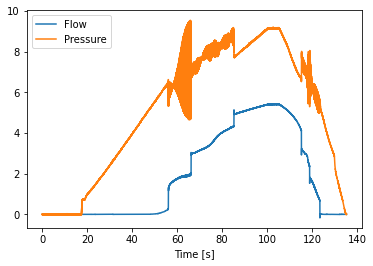

In [5]:
flow = data[0][1]['AWM20-12'].values #SLPM
P = data[0][1]['MPX100-10'].values # Pa 
time = data[0][1]['Time']

plt.plot(time,flow, label = 'Flow')
plt.plot(time,P/1000, label = "Pressure")
plt.legend()
plt.xlabel('Time [s]')

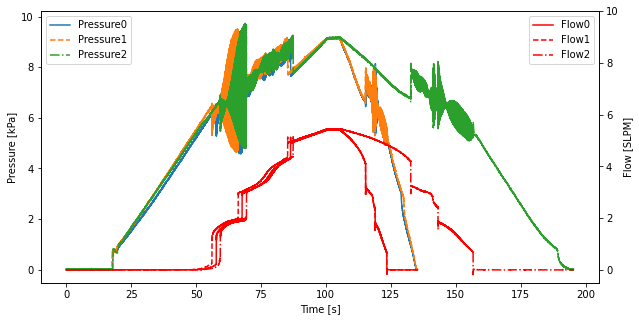

In [6]:
plt.figure(figsize=[10, 5]) # Optional, set the size of the plot
linetypes = ['-', '--', '-.', ':'] # Define a list of linetypes

for i in range(len(data[0])):
    flow = data[0][i]['AWM20-12'].values #SLPM
    P = data[0][i]['MPX100-10'].values # Pa 
    time = data[0][i]['Time']

    # Select linetype using the modulo operator to loop through the linetypes list
    linetype = linetypes[i % len(linetypes)]

    plt.plot(time, P/1000,linetype,label="Pressure"+str(i))
    plt.xlabel('Time [s]')
    plt.ylabel('Pressure [kPa]')
    plt.legend(loc="upper left")

# Create a twin y-axis to plot the flow on the right side
ax2 = plt.gca().twinx()
for i in range(len(data[0])):
    flow = data[0][i]['AWM20-12'].values #SLPM
    time = data[0][i]['Time']

    # Select linetype using the modulo operator to loop through the linetypes list
    linetype = linetypes[i % len(linetypes)]
    
    ax2.plot(time, flow,linetype, color='r', label='Flow'+str(i))
    ax2.set_ylabel('Flow [SLPM]')
    ax2.legend(loc="upper right")

ax2.set_ylim(-0.5, 5)
plt.ylim(-0.5, 10)
plt.show()


(-0.25, 1.0)

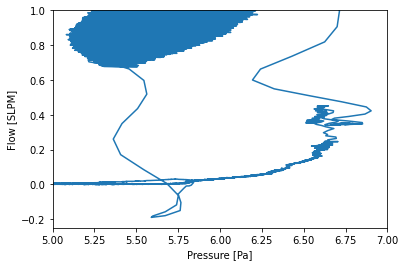

In [13]:
plt.plot(P/1000,flow)
plt.xlabel('Pressure [Pa]')
plt.ylabel('Flow [SLPM]')
plt.xlim(5,7)
plt.ylim(-0.25, 1)

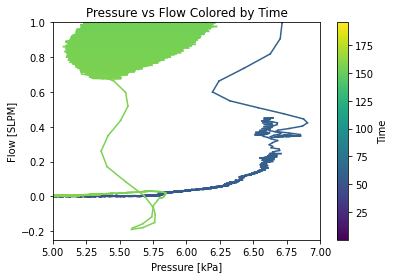

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Create a colormap
colormap = cm.get_cmap('viridis')

# Normalize the time variable to fit the colormap scale
norm_time = (time - time.min()) / (time.max() - time.min())

# Loop through and plot each segment with corresponding color
for i in range(len(time) - 1):
    plt.plot(P[i:i+2]/1000, flow[i:i+2], color=colormap(norm_time[i]))

# Add a colorbar to represent the time variable
sm = cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=time.min(), vmax=time.max()))
sm.set_array([])
plt.colorbar(sm, label='Time')

plt.xlabel('Pressure [kPa]')
plt.ylabel('Flow [SLPM]')
plt.title('Pressure vs Flow Colored by Time')
plt.xlim(5,7)
plt.ylim(-0.25, 1)
plt.show()
